In [6]:
import onnxruntime
import numpy as np
from transformers import BertTokenizer
 # Load the ONNX model
onnx_model_path = "./quantized_tinybert (1).onnx"
ort_session = onnxruntime.InferenceSession(onnx_model_path)
 # Tokenize inp
tokenizer = BertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
input_text = "20 * 5 + 3 = "
length=len(input_text)
print(f"Length of the string: {length}")
input_ids = tokenizer.encode(input_text, return_tensors="np", padding=True, 
truncation=True)
input_ids = np.array(input_ids, dtype=np.int64)
 # Run the model
ort_inputs = {"input_ids": input_ids}
ort_outs = ort_session.run(None, ort_inputs)
  # Get the prediction
predicted_class = np.argmax(ort_outs[0])
print("Predicted class:", predicted_class)
import time
start_time = time.time()
output = ort_session.run(None, {ort_session.get_inputs()[0].name:  input_ids})
end_time = time.time()
# Calculate latency
latency_ms = (end_time-start_time) *1000
print(f"Latency: {latency_ms:.2f} ms")

# Generate input data (you need to replace this with your actual input data)
input_shape = (1, 8)  # Assuming input shape is (batch_size, sequence_length)
input_data = np.random.rand(*input_shape).astype(np.int64)

# Perform inference and measure throughput
num_iterations = 100  # Number of inference iterations
start_time = time.time()
for _ in range(num_iterations):
    output = ort_session.run([], {"input_ids": input_data}) # Replace "input" with the actual inputname in yourmodel
end_time = time.time()

# Calculate throughput
total_time = end_time - start_time
average_time_per_iteration = total_time / num_iterations
throughput = 1 / average_time_per_iteration  # Throughput in inferences per second

print(f"Throughput: {throughput} inferences/second")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Length of the string: 13
Predicted class: 1
Latency: 2.05 ms
Throughput: 354.57057717099565 inferences/second


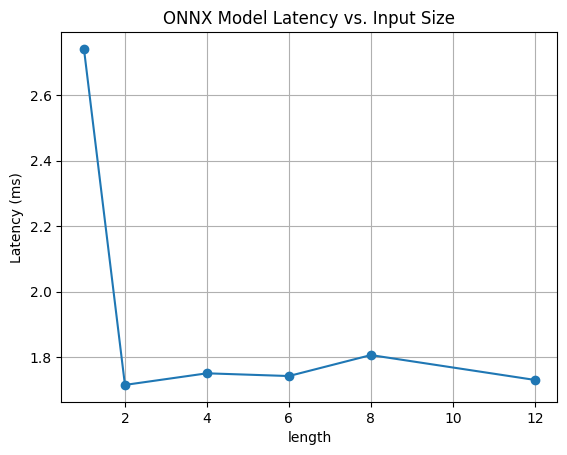

In [21]:
import matplotlib.pyplot as plt

input_sizes = [1,2,4,6,8,12]  # Example input sizes (batch size)
latencies = []

for batch_size in input_sizes:
    start_time = time.time()
    output =  ort_session.run(None, { ort_session.get_inputs()[0].name: input_ids})
    end_time = time.time()
    latency_ms = (end_time - start_time) * 1000
    latencies.append(latency_ms)

# Plot latency vs. input size
plt.plot(input_sizes, latencies, marker='o')
plt.xlabel("length")
plt.ylabel("Latency (ms)")
plt.title("ONNX Model Latency vs. Input Size")
plt.grid(True)
plt.show()

In [1]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import tensorflow as tf
import time

# Load the model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

# Example text
text = "What is capital of India?"
length=len(text)
print(f"Length of the string: {length}")
# Tokenize input text
inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True)

# Measure inference time for a single example
start_time = time.time()
_ = model(**inputs)
end_time = time.time()

latency_ms = (end_time - start_time) * 1000
print(f"Latency: {latency_ms:.2f} ms")

# Measure inference time for multiple examples
num_examples = 100
start_time = time.time()
for _ in range(num_examples):
    _ = model(**inputs)
end_time = time.time()

total_inference_time = end_time - start_time
throughput = num_examples / total_inference_time
print(f"Throughput: {throughput:.2f} examples/second")

2024-06-05 12:10:23.546015: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 325260288 exceeds 10% of free system memory.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Length of the string: 25
Latency: 264.56 ms
Throughput: 4.96 examples/second


In [13]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import time
# Load the TinyBERT model and tokenizer
model_name = "huawei-noah/TinyBERT_General_4L_312D"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Sample input text (replace with your own text)
input_text = "what is the capital of india?"
length=len(input_text)
print(f"Length of the string: {length}")

# Tokenize input text
input_ids = tokenizer(input_text,padding=True, truncation=True, return_tensors="pt")["input_ids"]

# Measure latency
with torch.no_grad():
    start_time = time.time()
    outputs = model(input_ids)
    end_time = time.time()

latency = (end_time - start_time) * 1000  # Convert to milliseconds

print("Latency:", latency, "ms")
for _ in range(3):
     model(input_ids=input_ids)
# Measure throughput
start_time = time.time()
num_exam=100
for _ in range(num_exam):  # Adjust the number of iterations according to your requirements
    model(input_ids=input_ids)
end_time = time.time()
total_time = end_time - start_time
throughput = num_exam / total_time
print("Throughput:", throughput, "inferences/second")

Some weights of the model checkpoint at huawei-noah/TinyBERT_General_4L_312D were not used when initializing BertForSequenceClassification: ['fit_denses.2.bias', 'fit_denses.3.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'fit_denses.1.bias', 'fit_denses.0.weight', 'fit_denses.3.weight', 'cls.predictions.transform.LayerNorm.bias', 'fit_denses.2.weight', 'fit_denses.4.bias', 'fit_denses.4.weight', 'cls.predictions.transform.dense.weight', 'fit_denses.1.weight', 'cls.seq_relationship.weight', 'fit_denses.0.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a

Length of the string: 29
Latency: 14.159917831420898 ms
Throughput: 132.36951076378995 inferences/second


In [22]:
import onnxruntime
import numpy as np
from transformers import BertTokenizer
 # Load the ONNX model
onnx_model_path = "./yourmodel.onnx"
ort_session = onnxruntime.InferenceSession(onnx_model_path)
 # Tokenize inp
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
input_sentence = "What capital of India?"
length=len(input_sentence)
print(f"Length of the string: {length}")
input_ids_1= tokenizer.encode(input_sentence, return_tensors="np", padding=True, 
truncation=True)
input_ids_1 = np.array(input_ids_1, dtype=np.int64)
 # Run the model
ort_inputs = {"input.1": input_ids_1}
ort_outs = ort_session.run(None, ort_inputs)
  # Get the prediction
predicted_class = np.argmax(ort_outs[0])
print("Predicted class:", predicted_class)
import time
start_time = time.time()
output = ort_session.run(None, {ort_session.get_inputs()[0].name:  input_ids_1})
end_time = time.time()
# Calculate latency
latency_ms = (end_time-start_time) *1000
print(f"Latency: {latency_ms:.2f} ms")

# Generate input data (you need to replace this with your actual input data)
input_shape = (1, 7)  # Assuming input shape is (batch_size, sequence_length)
input_data = np.random.rand(*input_shape).astype(np.int64)

# Perform inference and measure throughput
num_iterations = 100  # Number of inference iterations
start_time = time.time()
for _ in range(num_iterations):
    output = ort_session.run([], {"input.1": input_data})  # Replace "input" with the actual input name in yourmodel
end_time = time.time()

# Calculate throughput
total_time = end_time - start_time
average_time_per_iteration = total_time / num_iterations
throughput = 1 / average_time_per_iteration  # Throughput in inferences per second

print(f"Throughput: {throughput} inferences/second")

Length of the string: 22
Predicted class: 0
Latency: 17.79 ms
Throughput: 25.34947588287626 inferences/second


In [5]:
import onnxruntime
import numpy as np
from transformers import BertTokenizer
 # Load the ONNX model
onnx_model_path = "./yourmodel.onnx"
ort_session = onnxruntime.InferenceSession(onnx_model_path)
 # Tokenize inp
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
input_sentence = "What capital of India?"
length=len(input_sentence)
print(f"Length of the string: {length}")
input_ids_1= tokenizer.encode(input_sentence, return_tensors="np", padding=True, 
truncation=True)
input_ids_1 = np.array(input_ids_1, dtype=np.int64)
 # Run the model
ort_inputs = {"input.1": input_ids_1}
ort_outs = ort_session.run(None, ort_inputs)
  # Get the prediction
predicted_class = np.argmax(ort_outs[0])
print("Predicted class:", predicted_class)
import time
start_time = time.time()
output = ort_session.run(None, {ort_session.get_inputs()[0].name:  input_ids_1})
end_time = time.time()
# Calculate latency
latency_ms = (end_time-start_time) *1000
print(f"Latency: {latency_ms:.2f} ms")

# Generate input data (you need to replace this with your actual input data)
input_shape = (1, 7)  # Assuming input shape is (batch_size, sequence_length)
input_data = np.random.rand(*input_shape).astype(np.int64)

# Perform inference and measure throughput
num_iterations = 100  # Number of inference iterations
start_time = time.time()
for _ in range(num_iterations):
    output = ort_session.run([], {"input.1": input_data})  # Replace "input" with the actual input name in your model
end_time = time.time()

# Calculate throughput
total_time = end_time - start_time
average_time_per_iteration = total_time / num_iterations
throughput = 1 / average_time_per_iteration  # Throughput in inferences per second

print(f"Throughput: {throughput} inferences/second")

Length of the string: 22
Predicted class: 0
Latency: 26.56 ms
Throughput: 26.975418710926988 inferences/second


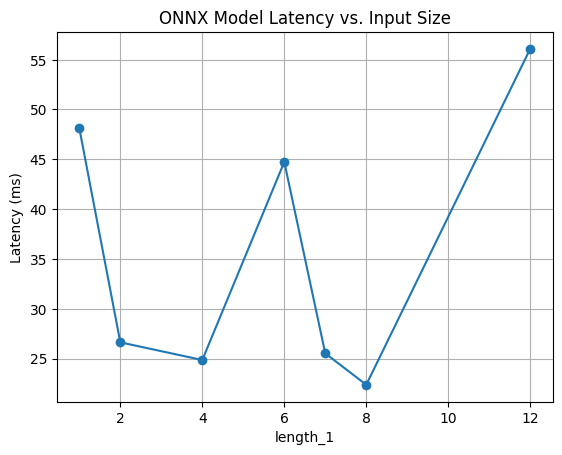

In [6]:
import matplotlib.pyplot as plt

input_sizes = [1,2,4,6,7,8,12]  # Example input sizes (batch size)
latencies = []

for batch_size in input_sizes:
    start_time = time.time()
    output =  ort_session.run(None, { ort_session.get_inputs()[0].name: input_ids_1})
    end_time = time.time()
    latency_ms = (end_time - start_time) * 1000
    latencies.append(latency_ms)

# Plot latency vs. input size
plt.plot(input_sizes, latencies, marker='o')
plt.xlabel("length_1")
plt.ylabel("Latency (ms)")
plt.title("ONNX Model Latency vs. Input Size")
plt.grid(True)
plt.show()